# Example of how to do a boxplot on a typical healthcare dataset
Most heathcare datasets can be broken down by category.  Many times we want to see the distribution of variables broken down by a specific category.  A boxplot is a great tool for doing that.  Pandas has a boxplot in its API.  Unfortunately, we usually need to do some flipping and need some helper functions to do this on typical datasets we encounter in the wild.  This notebook shows how to use the helper functions in koleksyon to build multi-page boxplots.

In [1]:
import koleksyon.lib as ll
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

HIPPA and other things make it hard to show data in the typical way, by patients and encounters, so we will be using the cars dataset to demonstrate the basics...

In [2]:
df = pd.read_csv("../../data/cars.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [6]:
# data prep to setup boxplot... say we want MSRP by manufacture
#note the new columns that are created:
#...Make_count
#...Make_sum
#...Make_label
df, freq, groupings = ll.boxplotPrep(df, "Make", "MSRP")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Make_count,Make_sum,Make_label
2116,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,18,13,2,209990,3,639970,Spyker(3|639970)
2118,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,18,13,2,209990,3,639970,Spyker(3|639970)
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769,3,5271671,Bugatti(3|5271671)
5202,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Performance",Large,Sedan,28,18,21,41400,3,139850,Genesis(3|139850)
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902,3,5271671,Bugatti(3|5271671)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,Chevrolet,Cavalier,2004,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,23,1385,15905,1123,31837483,Chevrolet(1123|31837483)
2360,Chevrolet,Cavalier,2004,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,33,23,1385,14235,1123,31837483,Chevrolet(1123|31837483)
2361,Chevrolet,Cavalier,2004,regular unleaded,140.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,33,23,1385,17610,1123,31837483,Chevrolet(1123|31837483)
2355,Chevrolet,Cavalier,2003,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,30,22,1385,15530,1123,31837483,Chevrolet(1123|31837483)


/Users/m102417/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/Users/m102417/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/Users/m102417/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged

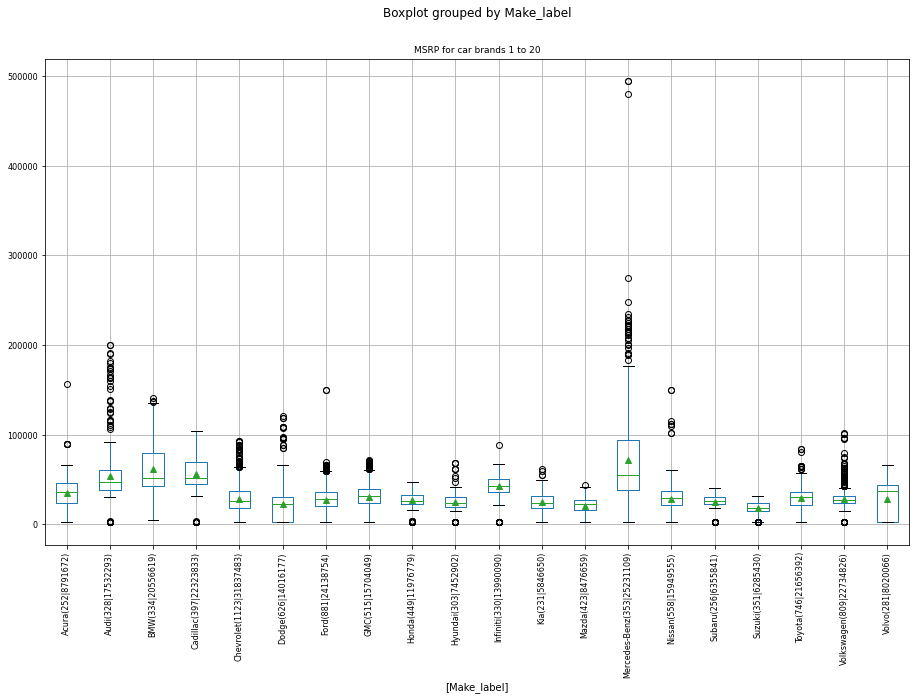

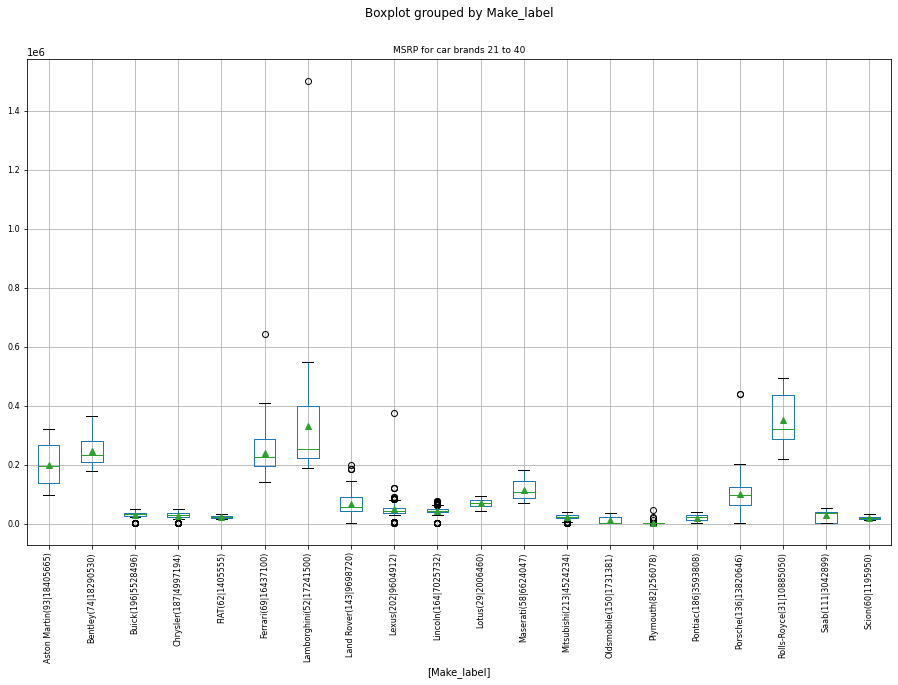

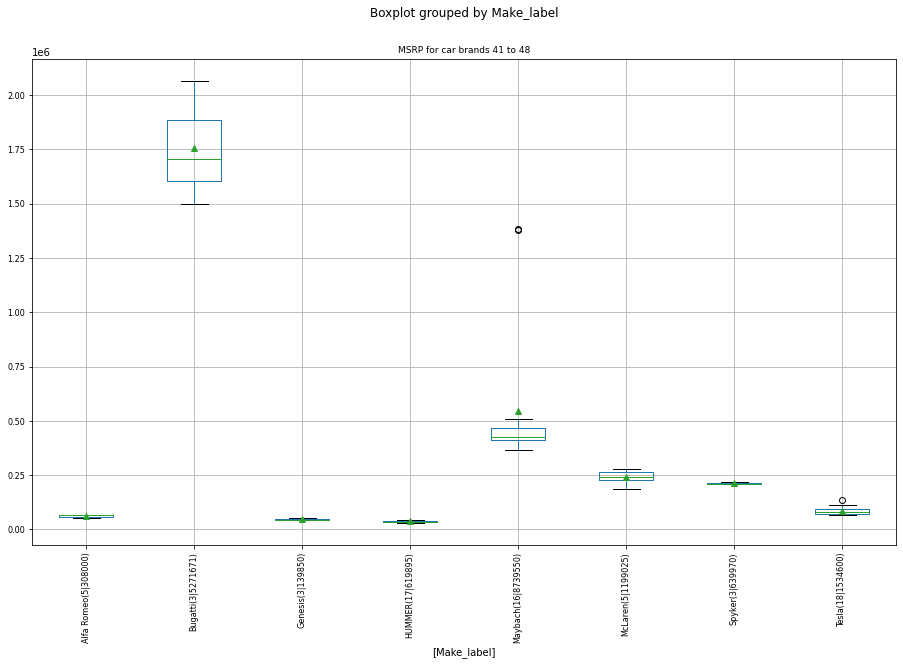

In [8]:
N = 20
allFigs = []
for k in groupings.keys():
    filterList = groupings.get(k)
    startIndex = k + 1
    if len(filterList) < N:
        endIndex = k + len(filterList)
    else:
        endIndex = k + N
    title = f"MSRP for car brands {startIndex} to {endIndex}"
    byCol = "Make_label"
    valCol = "MSRP"
    fig = ll.plotAGroup(df, byCol, valCol, filterList, title)
    allFigs.append(fig)

In [9]:
ll.saveToPDF("BrandsByMSRPBoxplot.pdf",allFigs)